# 探索的データ分析授業課題 信用情報の分析


### テキストの目的
- 実データに近いものの分析を行う
- データセットに対して自ら課題を設定できるようにする

### どのように学ぶか
- Kaggleのデータセットを通じて、データ分析の流れやライブラリの使い方を学びます。

## 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。


- Home Creditはどのような企業？
- このコンペティションでは何を予測する？
- それを予測することで企業が得られるメリットは何？

### 1.Home Creditはどのような企業？

⇒ホームクレジットは1997年にチェコ共和国で設立されたノンバンクの金融機関です。

同社は14カ国（米国、ロシア、カザスタン、ベラルーシ、中国、インドを含む）で事業を展開しており、主に融資を受けられなかったり、信用できない貸金業者の被害者となってしまった、信用履歴がほとんどない人たちへの融資に力を入れています。

Home Credit グループは、2900万人以上の顧客、210億ユーロの総資産、1億6,000万以上のローン、アジアでの大部分と中国でのほぼ半分の顧客を持っています（2018年5月19日現在）。

同社は、顧客の返済能力を予測するために、様々な代替データを使用しています - 電話会社や取引情報を含む - 。

彼らは自社のデータをKaggleコミュニティに公開し、データの可能性を最大限に引き出すためにKagglersに挑戦している。

(https://www.kaggle.com/gpreda/home-credit-default-risk-extensive-eda)

### 2.このコンペティションでは何を予測する？

⇒個人のクレジットの情報や以前の応募情報などから、各データが債務不履行になるかどうかを予測する

### 3.それを予測することで企業が得られるメリットは何？

⇒債務不履行の回避

## 【問題2】データの概観の把握

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('application_train.csv') 

# 最大表示数の設定
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Sing

In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,...,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192

In [7]:
# 欠損値の確認関数

def missing_values_summary(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'mis_val_count', 1 : 'mis_val_percent'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    'mis_val_percent', ascending=False).round(1)
    print ("カラム数：" + str(df.shape[1]) + "\n" + "欠損値のカラム数： " + str(mis_val_table_ren_columns.shape[0]))
    return mis_val_table_ren_columns

In [8]:
application_train_mv = missing_values_summary(df)
application_train_mv.head(30)

カラム数：122
欠損値のカラム数： 67


,mis_val_count,mis_val_percent
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


考察：122カラムの中、欠損値が67カラムもあり、また上位30カラムだけ見ても、欠損比率が50％超えており、欠損値処理を含め、かなりの前処理が必要になりそう。

<AxesSubplot:ylabel='TARGET'>

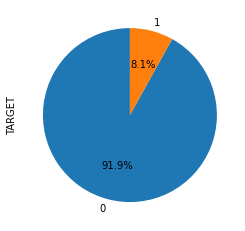

In [9]:
df['TARGET'].value_counts().plot(kind='pie', startangle=90, autopct="%1.1f%%")

考察：支払いが困難なクライアントの比率が8.1％と全体に対して少ない。説明変数が大量にあるのもあり、相関係数の高い特徴量を見つけ出すのは容易ではないと推測。

## 【問題3】課題設定

データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

■説明変数が多くて、また欠損値も多いため、そのままでは相関係数の高い特徴量を見つけ出すのは困難である。

■122カラムの中、欠損値が67カラムもあり、また上位30カラムだけ見ても、欠損比率が50％超えており、どのような欠損値処理が合理的なのか？

■支払いの遅延・困難の是非と相関係数が高い特徴量は何かあるのか？
支払いが困難とそうでないなクライアントは何か特徴を持つのか？
- 年齢？
- 性別？
- 職業？
- 収入？
- 家族構成？
- 資産？
- 住まいの状況？
- 教育レベル？

## 【問題4】データ探索

問題3で設定した課題・疑問を解決するためにデータ探索を進めます。

探索で使用する表やグラフを、考察と共に 15個以上 作成してください。

探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

★欠損値リストを全部出してみる

In [10]:
application_train_mv = missing_values_summary(df)
application_train_mv

カラム数：122
欠損値のカラム数： 67


,mis_val_count,mis_val_percent
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


★「AMT_REQ_CREDIT_BUREAU_YEAR」より上は4万個以上の欠損があるため、1500以上は削除

In [11]:
df_drop = application_train_mv[application_train_mv['mis_val_count'] >= 1500]
dropping_columns_list = list(df_drop.index)
df_dropped = df.drop(dropping_columns_list, axis=1)
df_dropped

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0.115992,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,1,1,0,1,0,1,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.535722,6.0,0.0,6.0,0.0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial asso

In [12]:
application_train_mv = missing_values_summary(df_dropped)
application_train_mv

カラム数：65
欠損値のカラム数： 10


,mis_val_count,mis_val_percent
NAME_TYPE_SUITE,1292,0.4
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.3
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.3
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.3
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.3
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0
DAYS_LAST_PHONE_CHANGE,1,0.0


★欠損値があるサンプル（行）は削除する。

In [13]:
df_dropped_fin = df_dropped.dropna(axis=0) #残っている欠損値のあるサンプル（行）を削除する
df_dropped_fin

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0.115992,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,1,1,0,1,0,1,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.535722,6.0,0.0,6.0,0.0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial asso

In [14]:
application_train_mv = missing_values_summary(df_dropped_fin)
application_train_mv

カラム数：65
欠損値のカラム数： 0


,mis_val_count,mis_val_percent


★年齢、性別に何か特徴はないのか？

<AxesSubplot:xlabel='CODE_GENDER', ylabel='DAYS_BIRTH'>

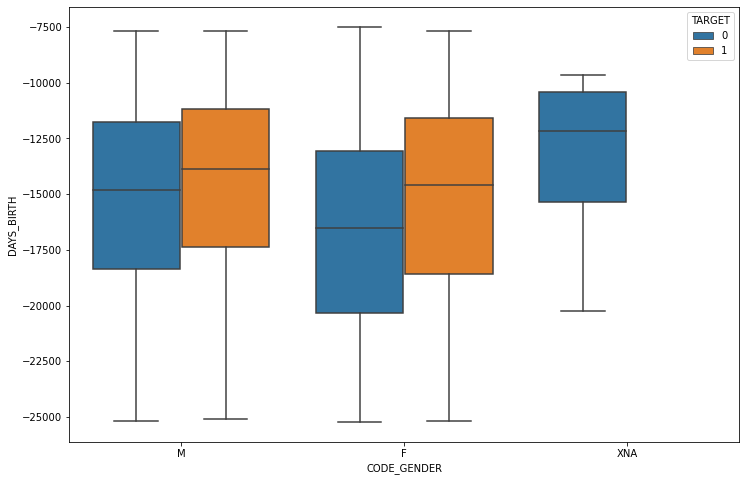

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='CODE_GENDER', y='DAYS_BIRTH', data=df_dropped_fin, hue='TARGET')

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

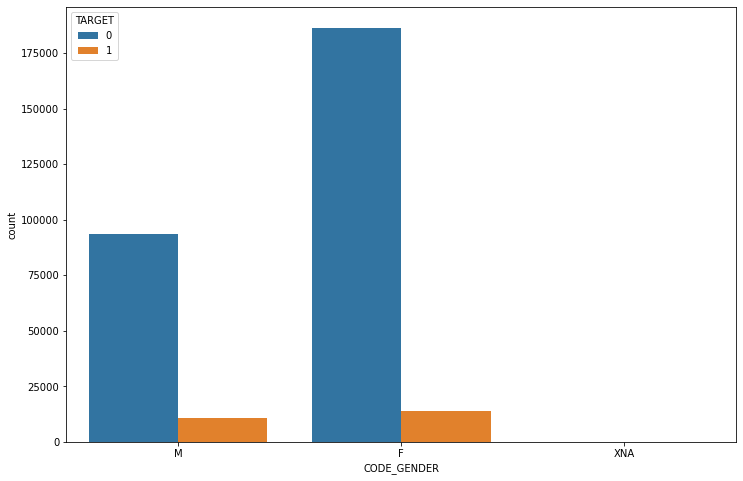

In [16]:
plt.figure(figsize=(12, 8))
sns.countplot(x='CODE_GENDER', data=df_dropped_fin, hue='TARGET')

<AxesSubplot:xlabel='CODE_GENDER', ylabel='TARGET'>

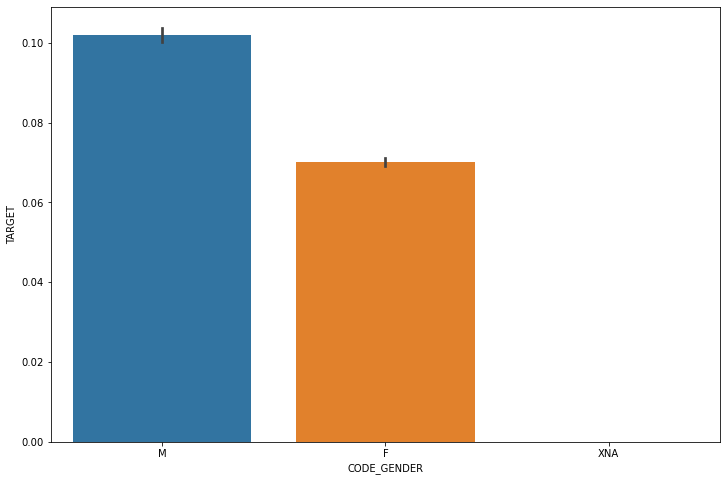

In [17]:
plt.figure(figsize=(12, 8))
sns.barplot(x='CODE_GENDER', y='TARGET', data=df_dropped_fin)

■年齢・性別に関する考察：
- 年齢から明確な差が見られなかった。
- 女性顧客は男性顧客の約2倍もいるが、支払いが困難な男女の人数差はそれほど違わないため、男性の比率（約10％）は女性（7％）より高いことが分かる。

★子供人数、家族人数に何か特徴はないのか？

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='TARGET'>

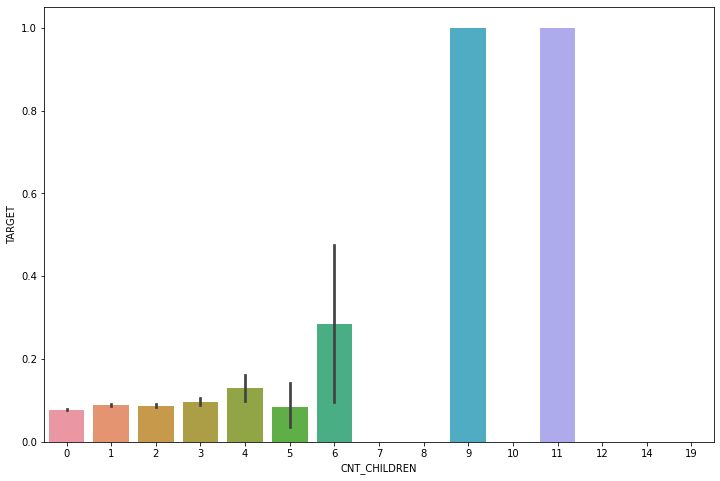

In [17]:
plt.figure(figsize=(12, 8))
sns.barplot(x='CNT_CHILDREN', y='TARGET', data=df_dropped_fin)

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='count'>

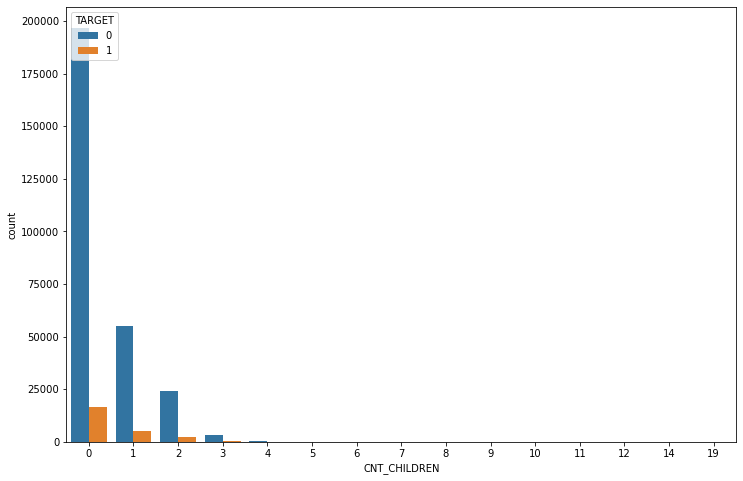

In [18]:
plt.figure(figsize=(12, 8))
sns.countplot(x='CNT_CHILDREN', data=df_dropped_fin, hue='TARGET')

<AxesSubplot:xlabel='CNT_FAM_MEMBERS', ylabel='TARGET'>

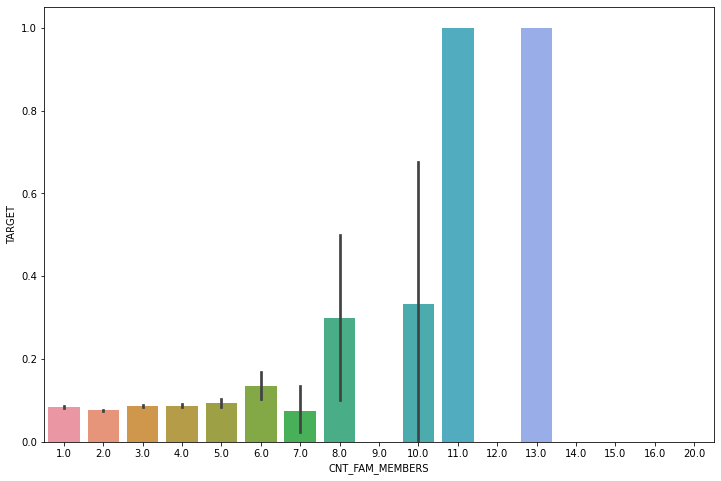

In [19]:
plt.figure(figsize=(12, 8))
sns.barplot(x='CNT_FAM_MEMBERS', y='TARGET', data=df_dropped_fin)

<AxesSubplot:xlabel='CNT_FAM_MEMBERS', ylabel='count'>

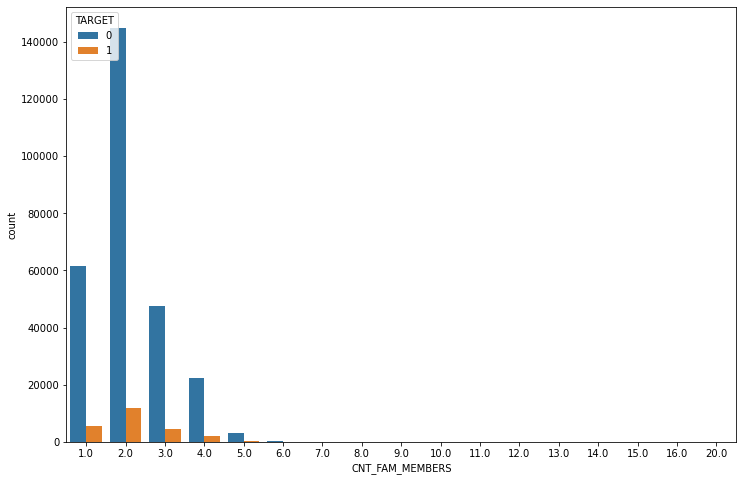

In [20]:
plt.figure(figsize=(12, 8))
sns.countplot(x='CNT_FAM_MEMBERS', data=df_dropped_fin, hue='TARGET')

<AxesSubplot:xlabel='CNT_FAM_MEMBERS', ylabel='count'>

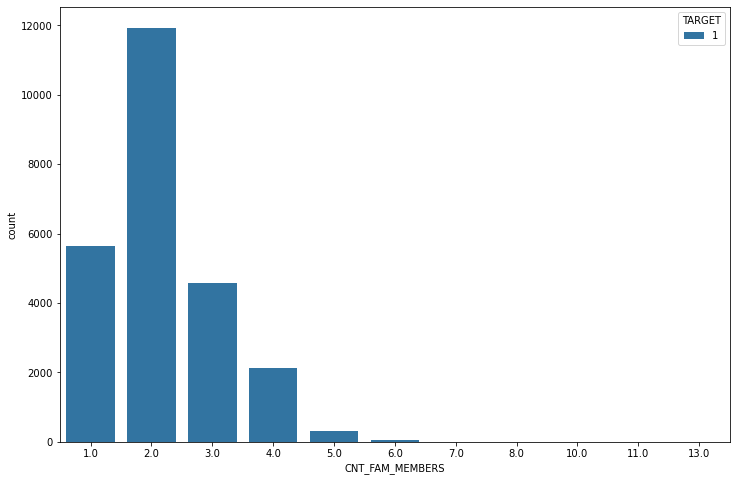

In [31]:
plt.figure(figsize=(12, 8))
sns.countplot(x='CNT_FAM_MEMBERS', data=df_TARGET_1, hue='TARGET')

■子供人数、家族人数に関する考察：

- 子供人数が9人と11人、家族人数11人と13人がいる家庭ではほぼ100％支払いが困難であり、
- それ以外、子供6人、家族人数8人の比率も他よりやや高い

ことが見えるが、実際の数は極めて少ない。


★職業に何か特徴はないのか？

<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='TARGET'>

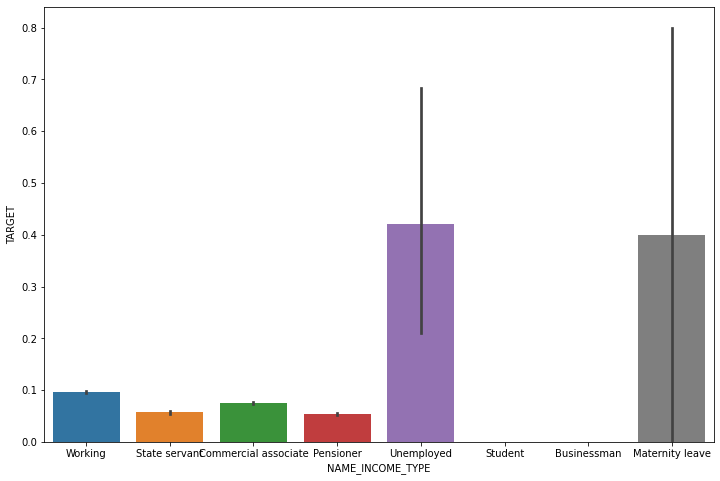

In [21]:
plt.figure(figsize=(12, 8))
sns.barplot(x='NAME_INCOME_TYPE', y='TARGET', data=df_dropped_fin)

<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='count'>

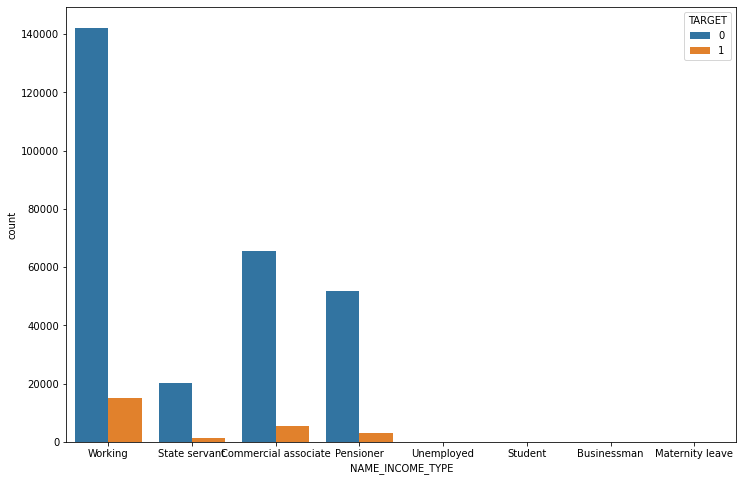

In [22]:
plt.figure(figsize=(12, 8))
sns.countplot(x='NAME_INCOME_TYPE', data=df_dropped_fin, hue='TARGET')

■職業に関する考察：

- 無職
- 産休

のクライアントの支払い困難比率は4割もあり、他に比べてやや3割以上も高いことが見える一方、実際の数は極めて少ない。

★住まいの状況に何か特徴はないのか？

<AxesSubplot:xlabel='NAME_HOUSING_TYPE', ylabel='TARGET'>

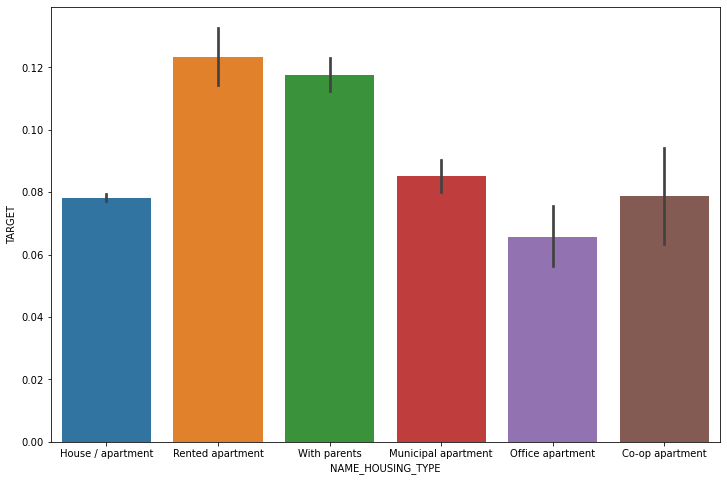

In [23]:
plt.figure(figsize=(12, 8))
sns.barplot(x='NAME_HOUSING_TYPE', y='TARGET', data=df_dropped_fin)

■住まいの状況に関する考察：

- 賃貸住宅
- 親と同居

は他に比べて支払い困難比率がやや高いように見えるが、4％前後の差だけにとどまっている。

★保有資産（不動産と車）の有無に何か特徴はないのか？

<AxesSubplot:xlabel='FLAG_OWN_REALTY', ylabel='TARGET'>

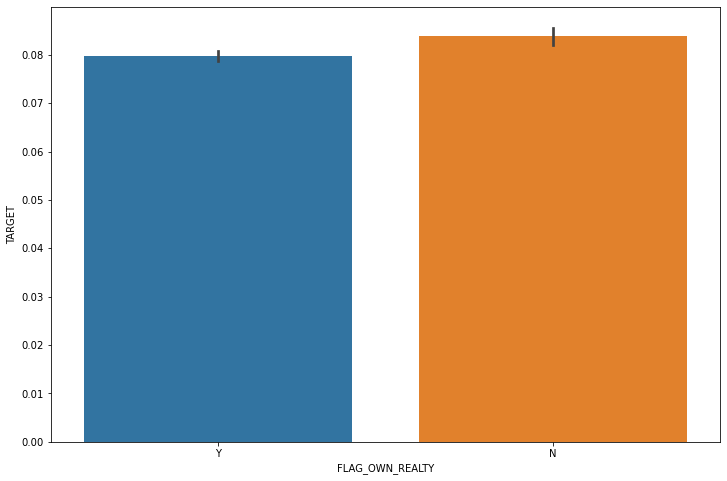

In [24]:
plt.figure(figsize=(12, 8))
sns.barplot(x='FLAG_OWN_REALTY', y='TARGET', data=df_dropped_fin)

<AxesSubplot:xlabel='FLAG_OWN_CAR', ylabel='TARGET'>

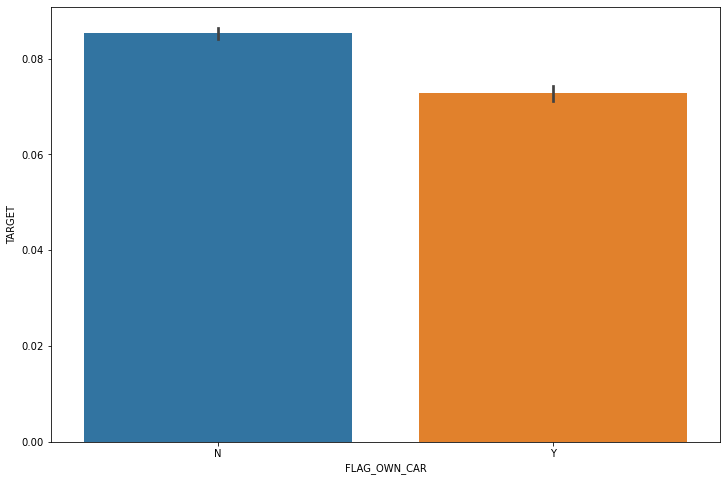

In [25]:
plt.figure(figsize=(12, 8))
sns.barplot(x='FLAG_OWN_CAR', y='TARGET', data=df_dropped_fin)

■保有資産（不動産と車）の有無の状況に関する考察：

保有資産の有無に有意の差が見られず、支払い困難比率はともに8％前後にとどまっている。

★教育レベルの差に何か特徴はないのか？

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='TARGET'>

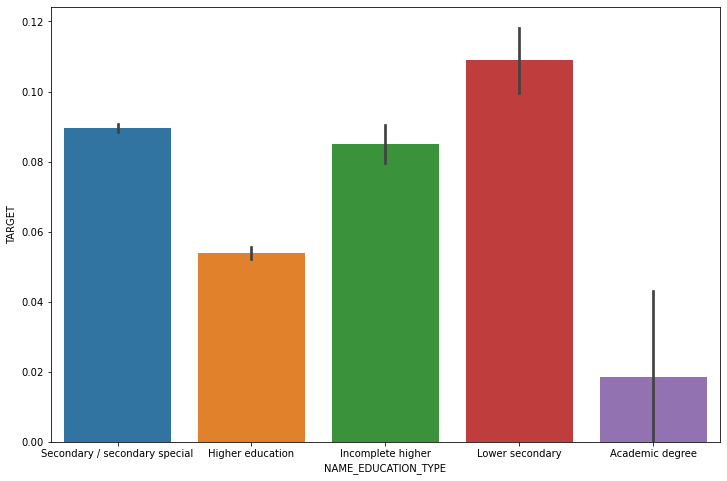

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(x='NAME_EDUCATION_TYPE', y='TARGET', data=df_dropped_fin)

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

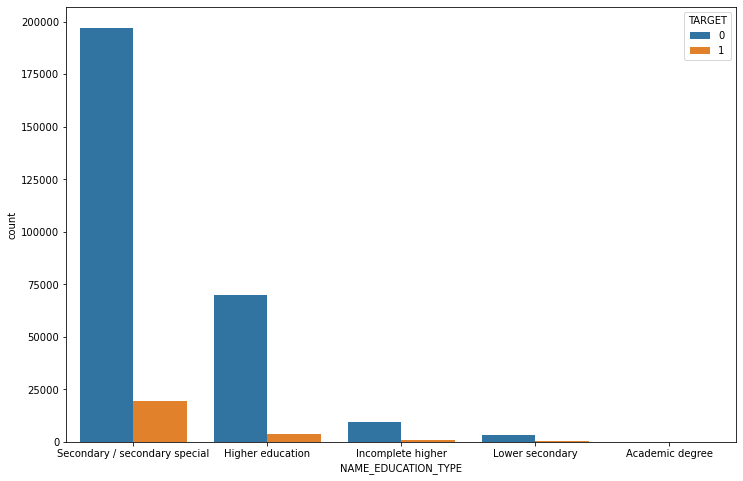

In [27]:
plt.figure(figsize=(12, 8))
sns.countplot(x='NAME_EDUCATION_TYPE', data=df_dropped_fin, hue='TARGET')

■教育レベルの差に関する考察：

全体的に教育レベルの比較的に低いクライアントが多く、「Academic degree」を除いても、他も1割前後にとどまっているので、有意の差が見られなかった。

★住んでいる地域に何か特徴はないのか？

<AxesSubplot:xlabel='REGION_RATING_CLIENT', ylabel='TARGET'>

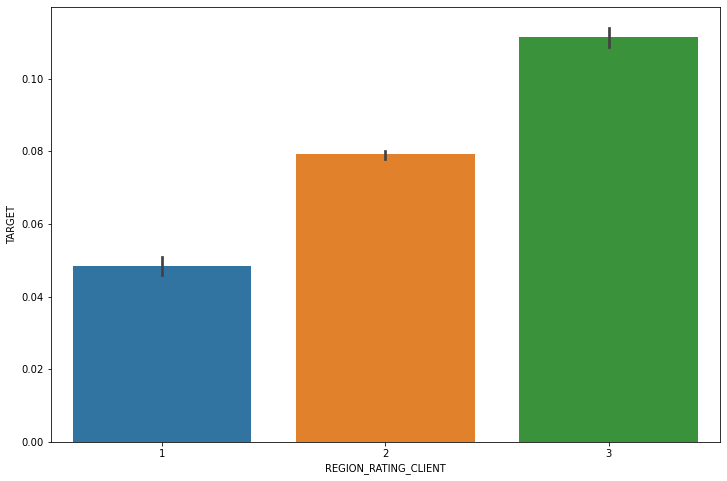

In [28]:
plt.figure(figsize=(12, 8))
sns.barplot(x='REGION_RATING_CLIENT', y='TARGET', data=df_dropped_fin)

<AxesSubplot:xlabel='REGION_RATING_CLIENT_W_CITY', ylabel='TARGET'>

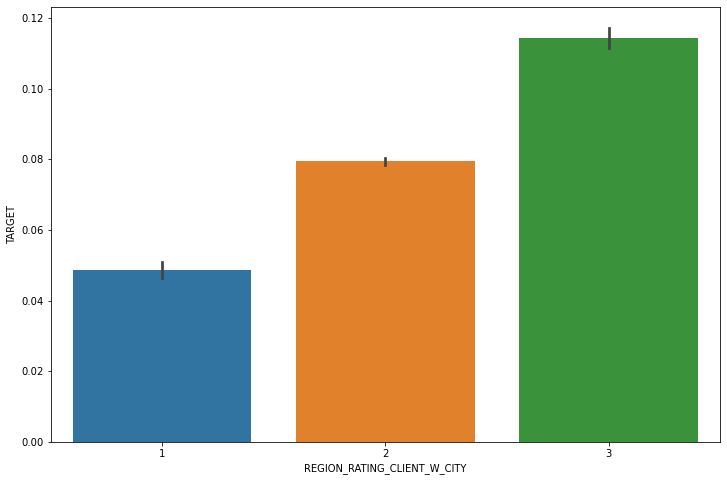

In [30]:
plt.figure(figsize=(12, 8))
sns.barplot(x='REGION_RATING_CLIENT_W_CITY', y='TARGET', data=df_dropped_fin)

■住んでいる地域に関する考察：

地域ごとの差はあるものの、4％前後の差にとどまっている。

★その他相関係数の確認

In [29]:
TARGET_corr = df_dropped_fin.corr()['TARGET'].sort_values(ascending=False) # TARGETとの相関係数を降順ソート
TARGET_corr

TARGET                         1.000000
DAYS_BIRTH                     0.078636
REGION_RATING_CLIENT_W_CITY    0.060900
REGION_RATING_CLIENT           0.058904
DAYS_LAST_PHONE_CHANGE         0.055887
DAYS_ID_PUBLISH                0.051397
REG_CITY_NOT_WORK_CITY         0.051146
FLAG_EMP_PHONE                 0.046223
REG_CITY_NOT_LIVE_CITY         0.044723
FLAG_DOCUMENT_3                0.043944
DAYS_REGISTRATION              0.042265
LIVE_CITY_NOT_WORK_CITY        0.032542
DEF_30_CNT_SOCIAL_CIRCLE       0.032068
DEF_60_CNT_SOCIAL_CIRCLE       0.031140
FLAG_WORK_PHONE                0.028366
CNT_CHILDREN                   0.019236
CNT_FAM_MEMBERS                0.009185
OBS_30_CNT_SOCIAL_CIRCLE       0.009088
OBS_60_CNT_SOCIAL_CIRCLE       0.008993
REG_REGION_NOT_WORK_REGION     0.007079
REG_REGION_NOT_LIVE_REGION     0.005634
FLAG_DOCUMENT_2                0.005429
FLAG_DOCUMENT_21               0.003919
LIVE_REGION_NOT_WORK_REGION    0.002963
FLAG_DOCUMENT_20               0.000416


In [32]:
TARGET_corr_10 = TARGET_corr[1:11] # TARGETを除いた10個の特徴量を抽出
TARGET_corr_10

DAYS_BIRTH                     0.078636
REGION_RATING_CLIENT_W_CITY    0.060900
REGION_RATING_CLIENT           0.058904
DAYS_LAST_PHONE_CHANGE         0.055887
DAYS_ID_PUBLISH                0.051397
REG_CITY_NOT_WORK_CITY         0.051146
FLAG_EMP_PHONE                 0.046223
REG_CITY_NOT_LIVE_CITY         0.044723
FLAG_DOCUMENT_3                0.043944
DAYS_REGISTRATION              0.042265
Name: TARGET, dtype: float64

<AxesSubplot:>

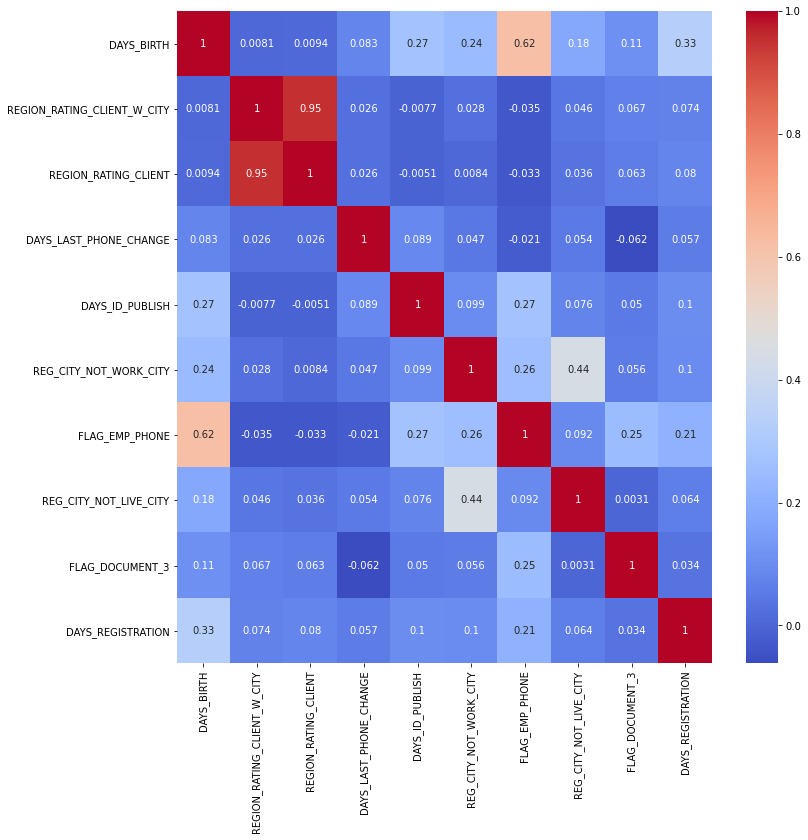

In [37]:
plt.figure(figsize=(12, 12))
df_TARGET_corr_10 = df[TARGET_corr_10.index] #抽出した10個の特徴量からなるDataFrameを作成
corr2 = df_TARGET_corr_10.corr()
sns.heatmap(corr2, cmap='coolwarm', annot=True) #抽出した10個の特徴量だけの相関係数行列ヒートマップを作る

★FLAG_EMP_PHONE(職場電話番号の提供)に関して

<AxesSubplot:xlabel='FLAG_EMP_PHONE', ylabel='TARGET'>

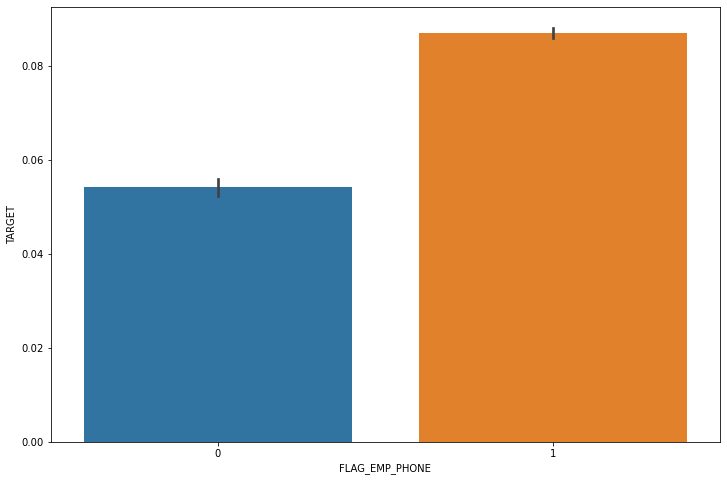

In [38]:
plt.figure(figsize=(12, 8))
sns.barplot(x='FLAG_EMP_PHONE', y='TARGET', data=df_dropped_fin)

■FLAG_EMP_PHONE(職場電話番号の提供)に関する考察

1（提供）と0（不提供）の差はわずか2％なので、有意の差とは言えない。

暫定結果：

- 女性顧客は男性顧客の約2倍もいるが、支払いが困難な男女の人数差はそれほど違わないため、男性の比率（約10％）は女性（7％）より高い。

- 子供人数が9人と11人、家族人数11人と13人がいる家庭ではほぼ100％支払いが困難であり、それ以外、子供6人、家族人数8人の比率も他よりやや高い。

- 無職、産休のクライアントの支払い困難比率は4割もあり、他に比べてやや3割以上も高いことが見える一方、実際の数は極めて少ない。

- 賃貸住宅、親と同居のクライアントは他に比べて支払い困難比率がやや高いように見えるが、4％前後の差だけにとどまっている。

- 地域の差はあるものの、4％前後の差にとどまっている。

### さらに男性のみのデータを抽出し、何か特徴がないかを探る

In [46]:
filter_m = df_dropped_fin['CODE_GENDER'] == 'M'
df_m = df_dropped_fin[filter_m]
df_m

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,1,1,1,1,0,0,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,0.714279,2.0,0.0,2.0,0.0,-1070.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307492,456236,0,Cash loans,M,Y,Y,0,585000.0,1575000.0,43443.0,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.028663,-20965,-1618,-1764.0,-4410,1,1,0,1,0,0,2.0,2,2,FRIDAY,10,0,0,0,0,0,0,Self-employed,0.599173,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307494,456238,0,Cash loans,M,Y,N,1,270000.0,479700.0,46858.5,450000.0,Family,Commercial associate,Secondary / secondary special,Married,House / apartment,0.035792,-14958,-6573,-1438.0,-4519,1,1,0,1,0,0,3.0,2,2,MONDAY,9,0,0,0,0,0,0,Self-employed,0.699727,11.0,0.0,11.0,0.0,-367.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307495,456239,0,Cash loans,M,Y,N,0,180000.0,808650.0,23773.5,675000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,-20922,-7438,-9596.0,-4440,1,1,0,1,1,0,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.267834,0.0,0.0,0.0,0.0,-2919.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307498,456242,0,Cash loans,M,Y,Y,0,198000.0,1312110.0,52168.5,1

In [47]:
TARGET_m_corr = df_m.corr()['TARGET'].sort_values(ascending=False) # TARGETとの相関係数を降順ソート
TARGET_m_corr

TARGET                         1.000000
REGION_RATING_CLIENT_W_CITY    0.068446
REGION_RATING_CLIENT           0.066152
FLAG_DOCUMENT_3                0.062830
DAYS_LAST_PHONE_CHANGE         0.061851
DAYS_BIRTH                     0.055201
DAYS_ID_PUBLISH                0.045355
REG_CITY_NOT_WORK_CITY         0.042335
DEF_30_CNT_SOCIAL_CIRCLE       0.040245
DEF_60_CNT_SOCIAL_CIRCLE       0.038990
REG_CITY_NOT_LIVE_CITY         0.038599
DAYS_REGISTRATION              0.032917
FLAG_EMP_PHONE                 0.030258
LIVE_CITY_NOT_WORK_CITY        0.024249
FLAG_WORK_PHONE                0.019332
OBS_30_CNT_SOCIAL_CIRCLE       0.009378
OBS_60_CNT_SOCIAL_CIRCLE       0.009336
REG_REGION_NOT_LIVE_REGION     0.008007
FLAG_DOCUMENT_21               0.004411
FLAG_DOCUMENT_2                0.004107
REG_REGION_NOT_WORK_REGION     0.003225
FLAG_DOCUMENT_5                0.000772
FLAG_CONT_MOBILE               0.000298
LIVE_REGION_NOT_WORK_REGION   -0.000810
FLAG_DOCUMENT_12              -0.001044


In [41]:
TARGET_m_corr_10 = TARGET_m_corr[1:11] # TARGETを除いた10個の特徴量を抽出(正の相関)
TARGET_m_corr_10

REGION_RATING_CLIENT_W_CITY    0.068446
REGION_RATING_CLIENT           0.066152
FLAG_DOCUMENT_3                0.062830
DAYS_LAST_PHONE_CHANGE         0.061851
DAYS_BIRTH                     0.055201
DAYS_ID_PUBLISH                0.045355
REG_CITY_NOT_WORK_CITY         0.042335
DEF_30_CNT_SOCIAL_CIRCLE       0.040245
DEF_60_CNT_SOCIAL_CIRCLE       0.038990
REG_CITY_NOT_LIVE_CITY         0.038599
Name: TARGET, dtype: float64

<AxesSubplot:>

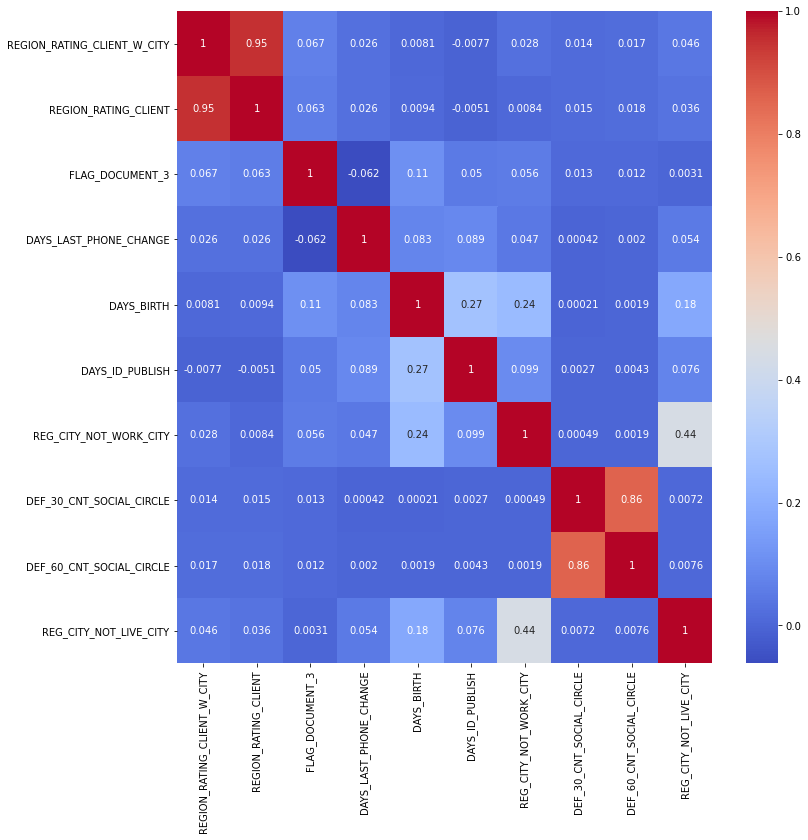

In [48]:
#正の相関
plt.figure(figsize=(12, 12))
df_TARGET_m_corr_10 = df[TARGET_m_corr_10.index] #抽出した10個の特徴量からなるDataFrameを作成
corr2 = df_TARGET_m_corr_10.corr()
sns.heatmap(corr2, cmap='coolwarm', annot=True) #抽出した10個の特徴量だけの相関係数行列ヒートマップを作る

■男性のみの目的変数との正の相関係数グラフからの考察：

「REGION_RATING_CLIENT_W_CITY」と「REGION_RATING_CLIENT」は似た指標で評価されている可能性が高く、それを除くと、「DEF_60_CNT_SOCIAL_CIRCLE」と「DEF_30_CNT_SOCIAL_CIRCLE」の間の相関は0.86もあり、どんなデータなのかさらに深堀りする必要がある。

In [51]:
TARGET_m_corr_neg = df_m.corr()['TARGET'].sort_values(ascending=True) # TARGETとの相関係数を昇順ソート
TARGET_m_corr_neg

EXT_SOURCE_2                  -0.183769
AMT_GOODS_PRICE               -0.058120
REGION_POPULATION_RELATIVE    -0.050196
AMT_CREDIT                    -0.047005
AMT_INCOME_TOTAL              -0.039085
FLAG_DOCUMENT_8               -0.032098
CNT_FAM_MEMBERS               -0.031015
DAYS_EMPLOYED                 -0.028944
HOUR_APPR_PROCESS_START       -0.026329
FLAG_PHONE                    -0.023050
AMT_ANNUITY                   -0.021483
FLAG_DOCUMENT_13              -0.020580
FLAG_DOCUMENT_6               -0.017034
FLAG_DOCUMENT_16              -0.015721
FLAG_DOCUMENT_18              -0.012587
FLAG_DOCUMENT_14              -0.010083
FLAG_DOCUMENT_15              -0.009781
CNT_CHILDREN                  -0.009151
FLAG_DOCUMENT_11              -0.006777
FLAG_DOCUMENT_17              -0.004559
FLAG_DOCUMENT_20              -0.004320
SK_ID_CURR                    -0.003392
FLAG_EMAIL                    -0.003173
FLAG_DOCUMENT_19              -0.003029
FLAG_DOCUMENT_9               -0.002402


In [52]:
TARGET_m_corr_10_neg = TARGET_m_corr_neg[:10] # TARGETを除いた10個の特徴量を抽出(負の相関)
TARGET_m_corr_10_neg

EXT_SOURCE_2                 -0.183769
AMT_GOODS_PRICE              -0.058120
REGION_POPULATION_RELATIVE   -0.050196
AMT_CREDIT                   -0.047005
AMT_INCOME_TOTAL             -0.039085
FLAG_DOCUMENT_8              -0.032098
CNT_FAM_MEMBERS              -0.031015
DAYS_EMPLOYED                -0.028944
HOUR_APPR_PROCESS_START      -0.026329
FLAG_PHONE                   -0.023050
Name: TARGET, dtype: float64

<AxesSubplot:>

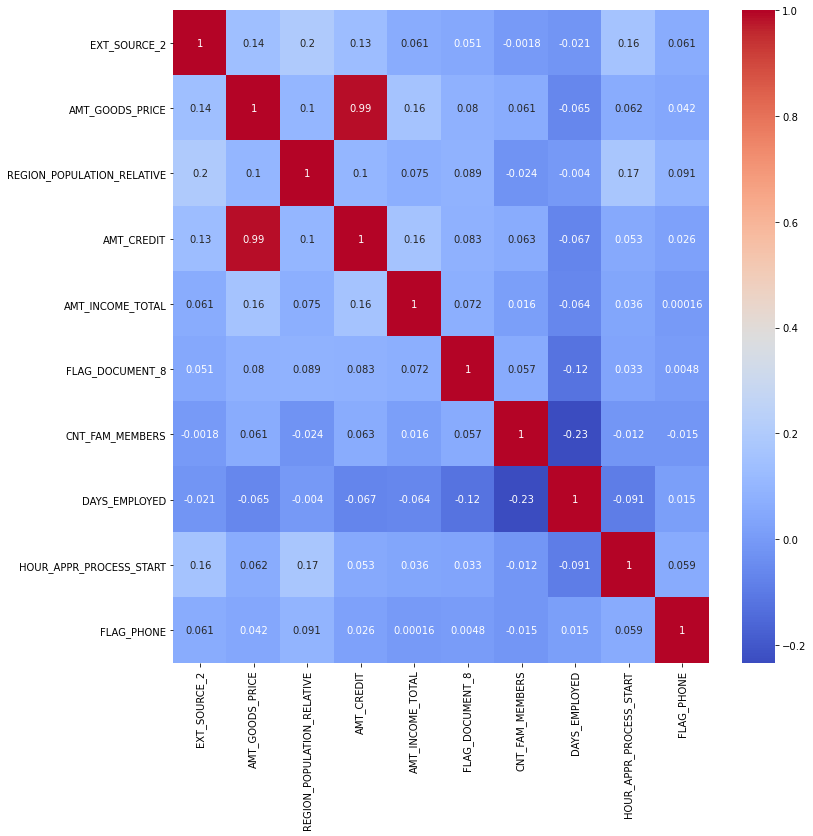

In [53]:
# 負の相関
plt.figure(figsize=(12, 12))
df_TARGET_m_corr_10_neg = df[TARGET_m_corr_10_neg.index] #抽出した10個の特徴量からなるDataFrameを作成
corr2 = df_TARGET_m_corr_10_neg.corr()
sns.heatmap(corr2, cmap='coolwarm', annot=True) #抽出した10個の特徴量だけの相関係数行列ヒートマップを作る

■男性のみの目的変数との負の相関係数グラフからの考察：

「AMT_CREDIT 」と「AMT_GOODS_PRICE」の間の相関は0.99もあり、別のファイルを確認し、どんなデータなのかさらに深堀りする必要がある。